In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('ex1data2.txt', header = None)

In [29]:
df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [30]:
df.describe()

,0,1,2
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


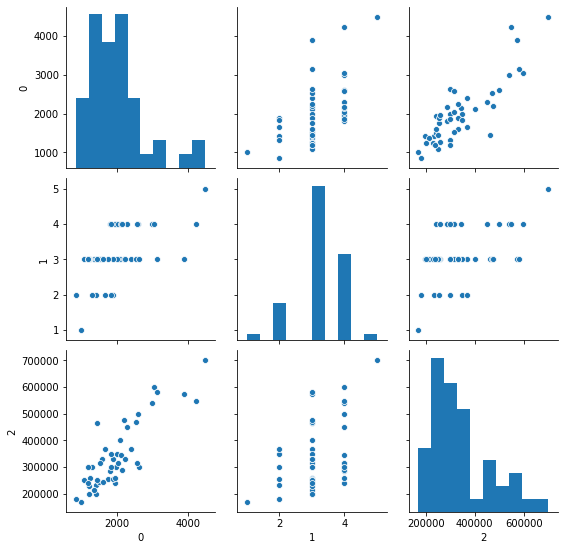

In [4]:
sns.pairplot(df)

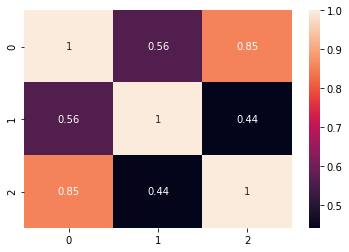

In [5]:
sns.heatmap(df.corr(), annot = True)

In [6]:
    m = len(df)
    X = np.append(arr = np.ones((m,1)).astype(int), values = df[[0,1]], axis = 1)
    y = df.iloc[:,2].to_numpy(dtype = float).reshape(-1, 1)

In [7]:
theta = np.zeros((X.shape[1],1))
iters = 1000
alpha = 0.001
cost = np.zeros((iters, 1))

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
norm_X = MinMaxScaler().fit(X)
X_train = norm_X.transform(X)
norm_y = MinMaxScaler().fit(y)
y_train = norm_y.transform(y)
X_train[:,0] = 1

In [10]:
def computeCost(X, y, theta):
    r = X @ w - y
    return 0.5*np.sum(r*r)

In [11]:
def GradientDescentMulti(X, y, theta, alpha):
    m = float(len(y))
    theta = theta - (alpha / m) * (X.T @ (X @ theta - y))
    return theta

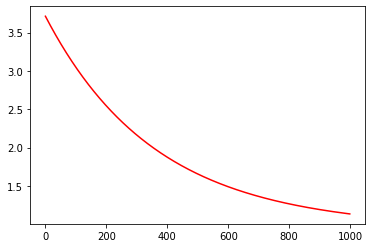

In [12]:
#training(X, y, theta, alpha, iters, cost):
for i in range(0, iters):       
    r = X_train @ theta - y_train
    cost[i] = 0.5*np.sum(r*r)
    theta = GradientDescentMulti(X_train, y_train, theta, alpha)
# 
plt.plot(np.arange(len(cost)), cost, color = 'r')

In [13]:
theta

array([[0.1663574 ],
       [0.09200171],
       [0.10618656]])

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
X_ = df.iloc[:, :2]
y_ = df.iloc[:,2]
X_t, X_test, y_t, y_test = train_test_split(X_, y_, test_size=0.3, random_state=42)
lm = LinearRegression()
lm.fit(X_t, y_t)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
prediction = lm.predict(X_test)

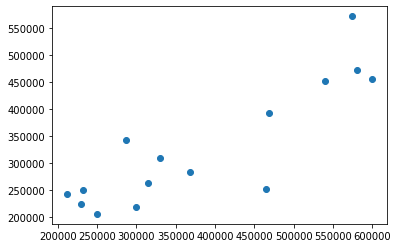

In [28]:
plt.scatter(y_test, prediction)